# Install and Import Dependencies

In [1]:
!pip install pycaret==3.0.4 shap -q

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report

from pycaret.classification import *

pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', 1000)

# Load Data

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
df = pd.read_csv('/content/drive/MyDrive/[2023-2024] - FIAP Tecnólogo Inteligência Artificial/S2/Front End & Mobile Development/Datasets/data.csv',encoding='utf-8')
df.shape

(2240, 29)

# Descriptive Analysis

In [5]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


In [6]:
df = df.convert_dtypes()
df.Dt_Customer = pd.to_datetime(df['Dt_Customer'])
df.dtypes

ID                              Int64
Year_Birth                      Int64
Education                      string
Marital_Status                 string
Income                          Int64
Kidhome                         Int64
Teenhome                        Int64
Dt_Customer            datetime64[ns]
Recency                         Int64
MntWines                        Int64
MntFruits                       Int64
MntMeatProducts                 Int64
MntFishProducts                 Int64
MntSweetProducts                Int64
MntGoldProds                    Int64
NumDealsPurchases               Int64
NumWebPurchases                 Int64
NumCatalogPurchases             Int64
NumStorePurchases               Int64
NumWebVisitsMonth               Int64
AcceptedCmp3                    Int64
AcceptedCmp4                    Int64
AcceptedCmp5                    Int64
AcceptedCmp1                    Int64
AcceptedCmp2                    Int64
Complain                        Int64
Z_CostContac

## Numerical features

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,2240.0,5592.159821,3246.662198,0.0,2828.25,5458.5,8427.75,11191.0
Year_Birth,2240.0,1968.805804,11.984069,1893.0,1959.0,1970.0,1977.0,1996.0
Income,2216.0,52247.251354,25173.076661,1730.0,35303.0,51381.5,68522.0,666666.0
Kidhome,2240.0,0.444196,0.538398,0.0,0.0,0.0,1.0,2.0
Teenhome,2240.0,0.50625,0.544538,0.0,0.0,0.0,1.0,2.0
Recency,2240.0,49.109375,28.962453,0.0,24.0,49.0,74.0,99.0
MntWines,2240.0,303.935714,336.597393,0.0,23.75,173.5,504.25,1493.0
MntFruits,2240.0,26.302232,39.773434,0.0,1.0,8.0,33.0,199.0
MntMeatProducts,2240.0,166.95,225.715373,0.0,16.0,67.0,232.0,1725.0
MntFishProducts,2240.0,37.525446,54.628979,0.0,3.0,12.0,50.0,259.0


### Deleting ID column

In [8]:
df['ID'].sample(10)

1554     5462
2099     3422
581      5314
1529     3536
2201    10968
422      6528
371     10313
2086     2802
749      4073
360      7274
Name: ID, dtype: Int64

In [9]:
df.drop('ID', axis= 1, inplace= True)
df.shape

(2240, 28)

Deleting the ID column above as it serves as an identifier code. The iFood Case does not provide other datasets for joining.

## Deleting duplicated values

In [10]:
print('Total of duplicated values:', df[df.duplicated()].shape[0])

Total of duplicated values: 182


Sample of duplicated values out of a total of 182.

In [11]:
df[df.duplicated()].head(1)

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
83,1963,Master,Together,38620,0,0,2013-05-11,56,112,17,44,34,22,89,1,2,5,3,3,0,0,0,0,0,0,3,11,0


In [12]:
df[df['Year_Birth'].eq(1963) &
   df['Education'].eq('Master') &
   df['Marital_Status'].eq('Together') &
   df['Income'].eq(38620)]

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
31,1963,Master,Together,38620,0,0,2013-05-11,56,112,17,44,34,22,89,1,2,5,3,3,0,0,0,0,0,0,3,11,0
83,1963,Master,Together,38620,0,0,2013-05-11,56,112,17,44,34,22,89,1,2,5,3,3,0,0,0,0,0,0,3,11,0


Analyzing the representation of duplicated values according to the target feature.

In [13]:
df[df.duplicated()]['Response'].value_counts()

0    161
1     21
Name: Response, dtype: Int64

In [14]:
df['Response'].value_counts(normalize = True)

0    0.850893
1    0.149107
Name: Response, dtype: Float64

In [15]:
print('% Duplicated values: ', np.round((df.duplicated().sum() / len(df)) * 100, 2))
print('% Duplicated values and Response == 1: ',
      np.round(((len(df[(df.duplicated()) & (df['Response'].eq(1))]) / len(df)) * 100), 2))

% Duplicated values:  8.12
% Duplicated values and Response == 1:  0.94


The ID column was hidding records already inserted into the dataset and only the last value will be kept to avoid the risk of overfitting and bias in classifying users with Response == 0. This is particularly important because this class exhibits a greater distribution in duplicated data compared to the rest of the dataframe.

In [16]:
print('Dataframe shape before drop_duplicates:', df.shape[0])
df = df.drop_duplicates(keep= 'last')
df = df.reset_index(drop= True)
print('Dataframe shape after drop_duplicates:', df.drop_duplicates().shape[0])

Dataframe shape before drop_duplicates: 2240
Dataframe shape after drop_duplicates: 2058


## Categorical features

In [17]:
df.describe(include= 'string')

,Education,Marital_Status
count,2058,2058
unique,5,8
top,Graduation,Married
freq,1030,795


In [18]:
df['Education'].value_counts(normalize= True)

Graduation    0.500486
PhD           0.218659
Master        0.165695
2n Cycle      0.091351
Basic          0.02381
Name: Education, dtype: Float64

### Transforming Marital_Status column

In [19]:
df['Marital_Status'].value_counts(normalize= True)

Married     0.386297
Together    0.253158
Single      0.217687
Divorced    0.104956
Widow         0.0345
Alone       0.001458
Absurd      0.000972
YOLO        0.000972
Name: Marital_Status, dtype: Float64

In [20]:
df['Marital_Status'] = df['Marital_Status'].apply(lambda x : 'Single' if x.lower() == 'alone' else x)
df['Marital_Status'] = df['Marital_Status'].astype("string")

In [21]:
marital_status_drop_index = df[df['Marital_Status'].str.lower().isin(['yolo','absurd'])].index

df.drop(marital_status_drop_index, inplace= True)

df = df.reset_index(drop= True)

In [22]:
df['Marital_Status'].value_counts()

Married     795
Together    521
Single      451
Divorced    216
Widow        71
Name: Marital_Status, dtype: Int64

## NaN analysis

In [23]:
def highlight_nans(val):
    return 'background-color: lightcoral' if val != 0 else ''

In [24]:
df.isnull().sum().to_frame().rename(columns= {0:'NaN values'}).style.applymap(highlight_nans)

,NaN values
Year_Birth,0
Education,0
Marital_Status,0
Income,24
Kidhome,0
Teenhome,0
Dt_Customer,0
Recency,0
MntWines,0
MntFruits,0


Only the feature "Income" contains NaN values. Analyzing the representation of NaN values according to the target feature.

In [25]:
df[df['Income'].isnull()]['Response'].value_counts()

0    23
1     1
Name: Response, dtype: Int64

In [26]:
df['Response'].value_counts(normalize = True)

0    0.848588
1    0.151412
Name: Response, dtype: Float64

In [27]:
print('% NaN samples: ', np.round((df['Income'].isnull().sum()/len(df)) * 100, 2))
print('% NaN samples and Response == 1: ',
      np.round((( len(df[(df['Income'].isnull()) & (df['Response'].eq(1))]) / len(df)) * 100), 2))

% NaN samples:  1.17
% NaN samples and Response == 1:  0.05


Considering that the 24 rows with NaN values represent 1% of the total dataset, and among the 24 rows where Income == NaN, only one had Response == 1 (0.05%), the 24 rows will be dropped.

In [28]:
print('Dataframe shape before dropna: ',df.shape[0])
df.dropna(axis= 0,inplace= True)
df = df.reset_index(drop= True)
print('Dataframe shape after dropna: ',df.shape[0])

Dataframe shape before dropna:  2054
Dataframe shape after dropna:  2030


## Features with unique values
(They should be deleted as they do not contribute to explaining the variation of the target feature).







In [29]:
df.nunique().sort_values()

Z_Revenue                 1
Z_CostContact             1
Response                  2
AcceptedCmp3              2
AcceptedCmp4              2
AcceptedCmp5              2
AcceptedCmp2              2
AcceptedCmp1              2
Complain                  2
Teenhome                  3
Kidhome                   3
Marital_Status            5
Education                 5
NumCatalogPurchases      14
NumStorePurchases        14
NumDealsPurchases        15
NumWebPurchases          15
NumWebVisitsMonth        16
Year_Birth               59
Recency                 100
MntFruits               158
MntSweetProducts        176
MntFishProducts         182
MntGoldProds            211
MntMeatProducts         554
Dt_Customer             662
MntWines                776
Income                 1973
dtype: int64

### Deleting Z_CostContact and Z_Revenue columns

In [30]:
df.drop(['Z_CostContact','Z_Revenue'], axis= 1, inplace= True, errors= 'ignore')

# Exploratory Data Analysis

## Transforming Year_Birth column into Age

In [31]:
df['Age'] = 2020 - df['Year_Birth']

df.drop('Year_Birth', axis= 1, inplace= True)
df.head()

,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age
0,Graduation,Single,58138,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1,63
1,Graduation,Single,46344,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0,66
2,Graduation,Together,71613,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0,55
3,Graduation,Together,26646,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0,36
4,PhD,Married,58293,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0,39


## Transforming Dt_Customer column into Time_Days_Customer

In [32]:
df['Time_Days_Customer'] = (pd.to_datetime('2020-02-19') - df['Dt_Customer']).dt.days

df.drop('Dt_Customer', axis= 1, inplace= True)

## Histogram of features

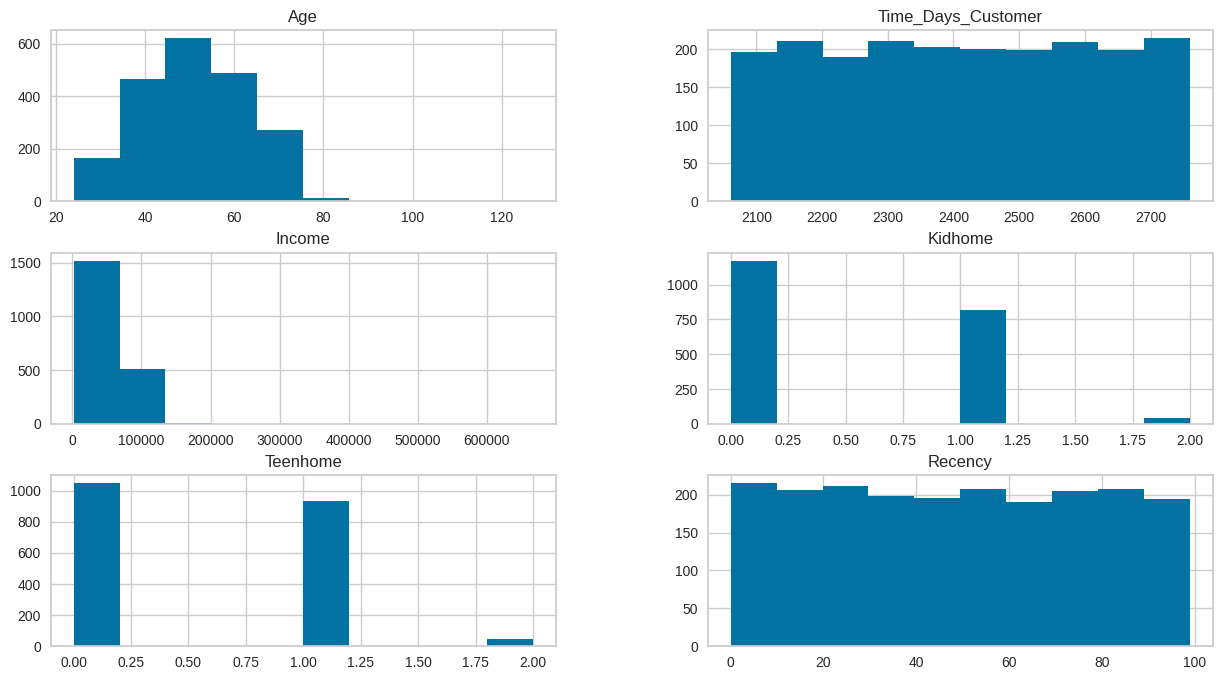

In [33]:
df.hist(column= ['Age', 'Time_Days_Customer', 'Income', 'Kidhome', 'Teenhome', 'Recency'], figsize= (15,8));

## Representation of Response == 0 and == 1 for each categorical variable.

In [34]:
df.rename(columns= {'Response':'z_Response'}, inplace= True)
cols = df.columns.sort_values()
df = df[cols]
df.rename(columns= {'z_Response':'Response'}, inplace= True)

df.columns

Index(['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4',
       'AcceptedCmp5', 'Age', 'Complain', 'Education', 'Income', 'Kidhome',
       'Marital_Status', 'MntFishProducts', 'MntFruits', 'MntGoldProds',
       'MntMeatProducts', 'MntSweetProducts', 'MntWines',
       'NumCatalogPurchases', 'NumDealsPurchases', 'NumStorePurchases',
       'NumWebPurchases', 'NumWebVisitsMonth', 'Recency', 'Teenhome',
       'Time_Days_Customer', 'Response'],
      dtype='object')

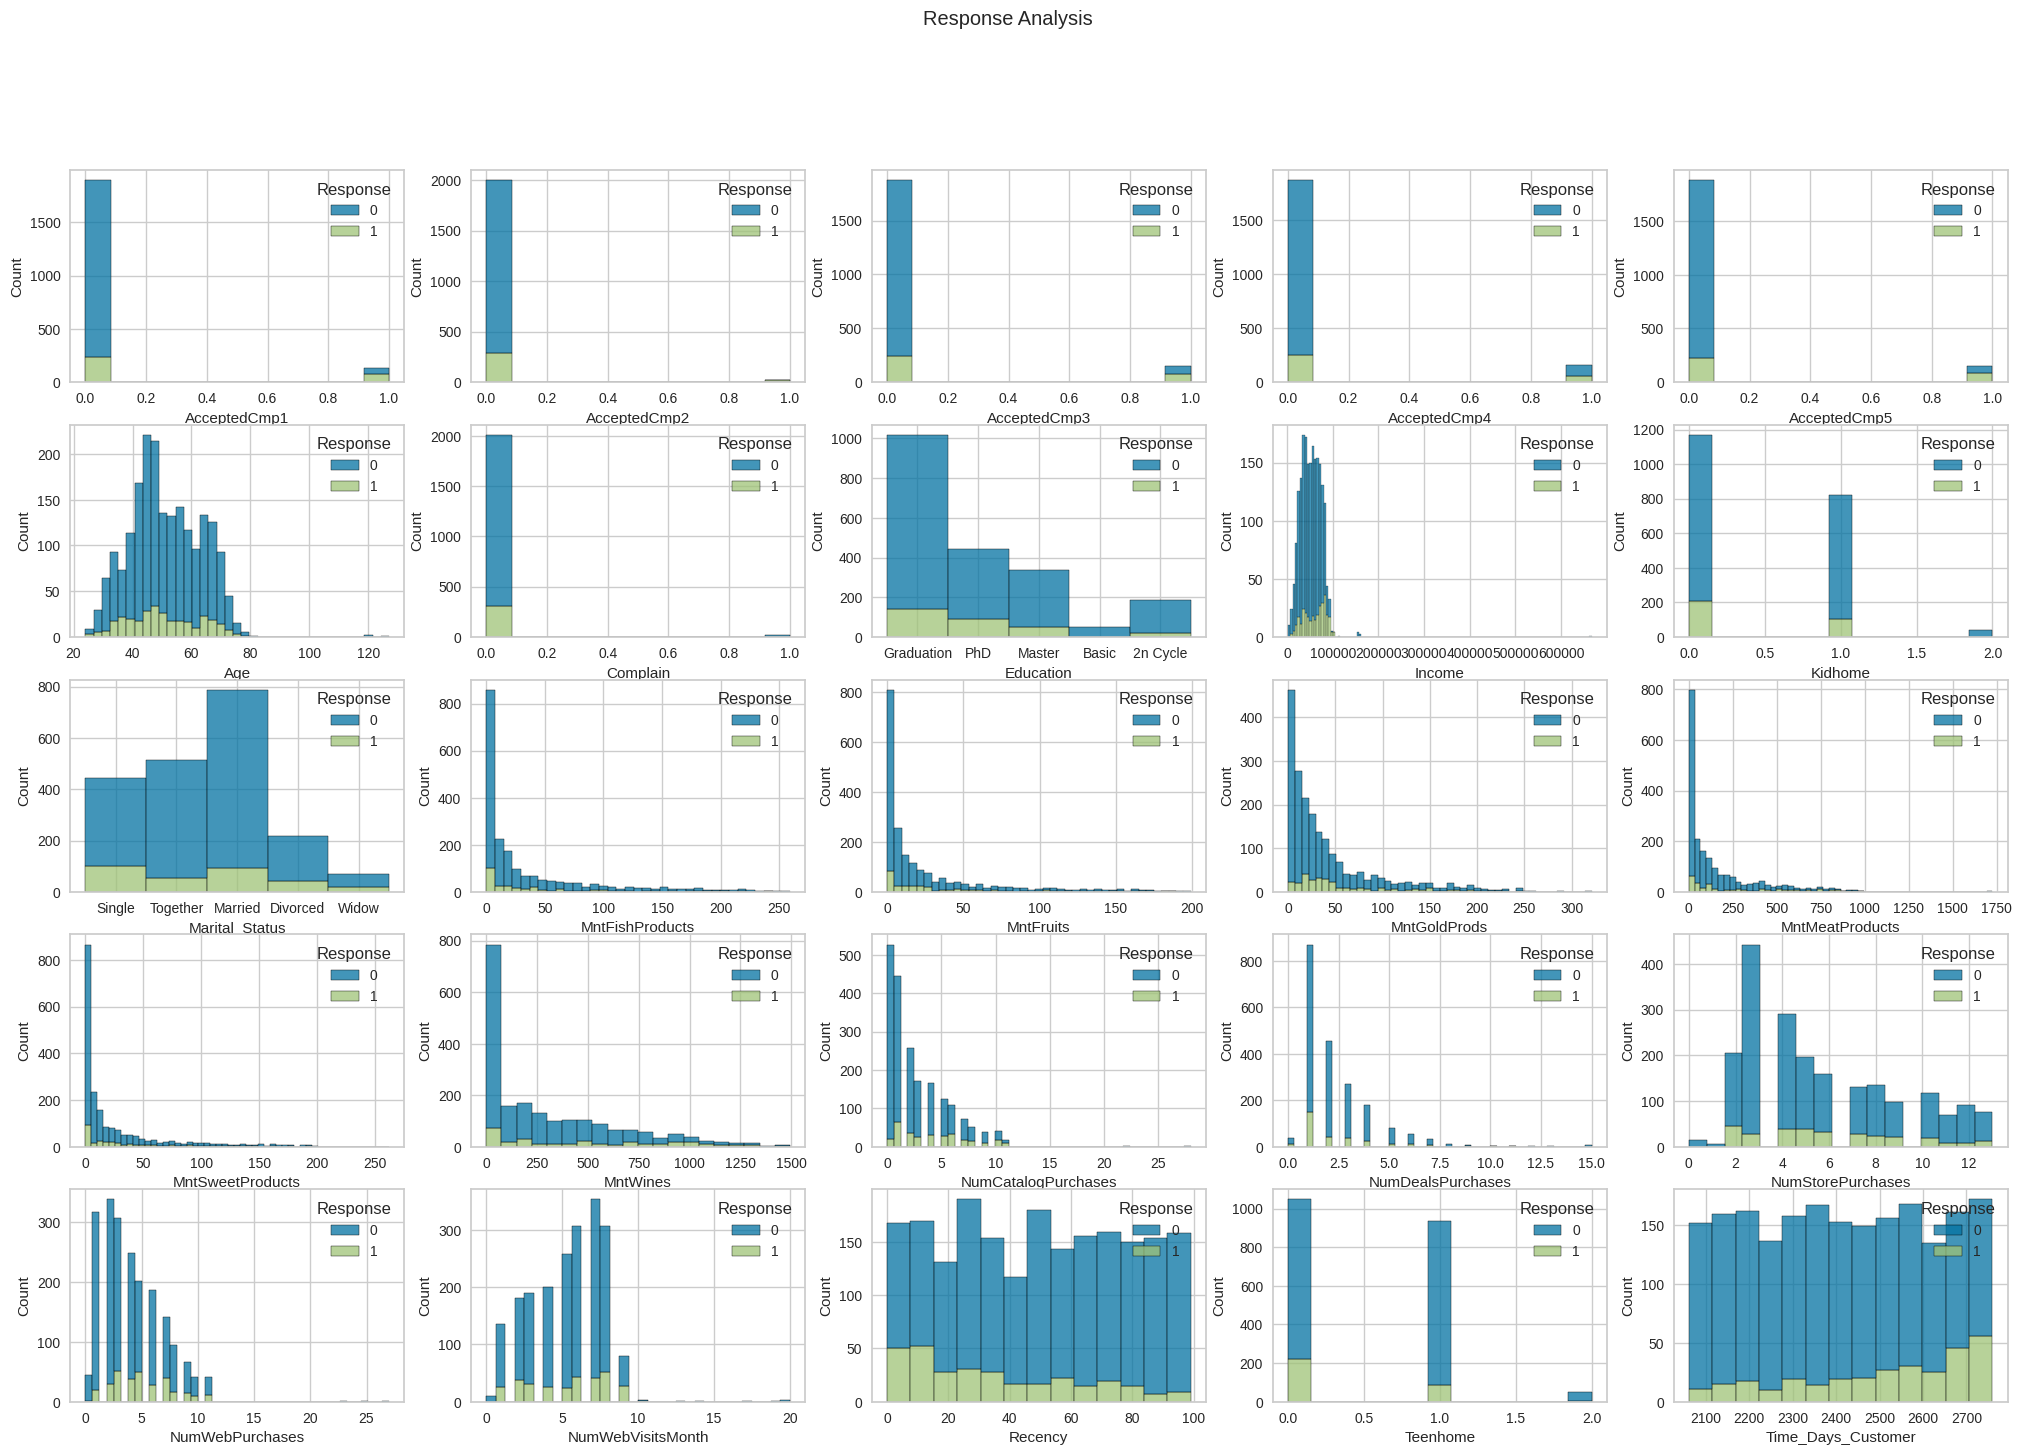

In [35]:
columns = df.columns
fig, axes = plt.subplots(5, 5, figsize= (25, 16), sharey= False)
fig.suptitle('Response Analysis')

feature= 0
for row in range(0, 5):
  for col in range(0, 5):
    sns.histplot(ax= axes[row, col], data= df, x= cols[feature], hue= "Response", multiple= "stack")
    feature += 1

# Dataset preparation to run models

## Dummy Features

### Marital_Status (nominal)

In [36]:
marital_aux = pd.get_dummies(df['Marital_Status'], prefix='Marital_Status', drop_first= True)
marital_aux.head(3)

,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow
0,0,1,0,0
1,0,1,0,0
2,0,0,1,0


In [37]:
df = pd.concat([df, marital_aux], axis= 1)
df.drop('Marital_Status', axis= 1, inplace=True)

### Education (ordinal)
[Basic: 0, Graduation: 1, 2n Cycle: 2, Master: 3, PhD: 4]

In [38]:
label_encoder = LabelEncoder()

df['Education'] = label_encoder.fit_transform(df['Education'])

In [39]:
df.head(3)

,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Age,Complain,Education,Income,Kidhome,MntFishProducts,MntFruits,MntGoldProds,MntMeatProducts,MntSweetProducts,MntWines,NumCatalogPurchases,NumDealsPurchases,NumStorePurchases,NumWebPurchases,NumWebVisitsMonth,Recency,Teenhome,Time_Days_Customer,Response,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow
0,0,0,0,0,0,63,0,2,58138,0,172,88,88,546,88,635,10,3,4,8,7,58,0,2724,1,0,1,0,0
1,0,0,0,0,0,66,0,2,46344,1,2,1,6,6,1,11,1,2,2,1,5,38,1,2174,0,0,1,0,0
2,0,0,0,0,0,55,0,2,71613,0,111,49,42,127,21,426,2,1,10,8,4,26,0,2373,0,0,0,1,0



## Train Test Split

In [40]:
# sample 5% of data to be used as unseen data
df_train_test = df.sample(frac= 0.95, random_state= 123)
df_train_test.reset_index(inplace= True, drop= True)

df_valid = df.drop(df_train_test.index)
df_valid.reset_index(inplace= True, drop= True)

print('Data for Modeling: ' + str(df_train_test.shape))
print('Unseen Data For Predictions: ' + str(df_valid.shape))

Data for Modeling: (1928, 29)
Unseen Data For Predictions: (102, 29)


# Predictive Model

In [41]:
s = setup(data= df_train_test,
          target= 'Response',
          fix_imbalance= True,
          remove_outliers= True,
          normalize= True,
          normalize_method= 'minmax',
          session_id= 123
)

,Description,Value
0,Session id,123
1,Target,Response
2,Target type,Binary
3,Original data shape,"(1928, 29)"
4,Transformed data shape,"(2813, 29)"
5,Transformed train set shape,"(2234, 29)"
6,Transformed test set shape,"(579, 29)"
7,Numeric features,28
8,Preprocess,True
9,Imputation type,simple


In [42]:
best_model = compare_models(sort= 'auc')

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.8021,0.8919,0.8183,0.4235,0.5558,0.4458,0.4874,1.7390
gbc,Gradient Boosting Classifier,0.8762,0.8894,0.4938,0.6253,0.5403,0.4713,0.4818,1.1210
lda,Linear Discriminant Analysis,0.7895,0.8889,0.8086,0.4075,0.5388,0.4230,0.4664,0.1990
xgboost,Extreme Gradient Boosting,0.8747,0.8770,0.4398,0.6311,0.5077,0.4401,0.4549,0.5540
lightgbm,Light Gradient Boosting Machine,0.8733,0.8748,0.4055,0.6265,0.4844,0.4176,0.4337,3.3810
rf,Random Forest Classifier,0.8621,0.8622,0.2876,0.6496,0.3765,0.3132,0.3547,1.2160
ada,Ada Boost Classifier,0.8658,0.8622,0.5781,0.5573,0.5620,0.4836,0.4870,0.4930
et,Extra Trees Classifier,0.8717,0.8555,0.3264,0.6769,0.4256,0.3649,0.4020,0.8500
nb,Naive Bayes,0.6743,0.8096,0.7490,0.3434,0.4529,0.3057,0.3338,0.3460
qda,Quadratic Discriminant Analysis,0.6823,0.8028,0.6605,0.3653,0.4404,0.3003,0.2988,0.1920


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

In [43]:
print(best_model)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


## Tune best model

In [44]:
lr = tune_model(best_model)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7852,0.8674,0.8000,0.3902,0.5246,0.4064,0.4501
1,0.7926,0.9178,0.9500,0.4130,0.5758,0.4653,0.5361
2,0.8222,0.9152,0.7500,0.4412,0.5556,0.4536,0.4786
3,0.8667,0.9287,0.9000,0.5294,0.6667,0.5902,0.6227
4,0.8148,0.8970,0.9000,0.4390,0.5902,0.4882,0.5408
5,0.7852,0.8574,0.8000,0.3902,0.5246,0.4064,0.4501
6,0.8148,0.9046,0.8095,0.4474,0.5763,0.4701,0.5039
7,0.7481,0.8718,0.8095,0.3617,0.5000,0.3630,0.4157
8,0.8222,0.8899,0.6190,0.4483,0.5200,0.4143,0.4224


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [45]:
print(lr)

LogisticRegression(C=6.718000000000001, class_weight={}, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=1000, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


## Model Evaluation

In [46]:
predictions = predict_model(lr)

y_true = predictions['Response']
y_pred = predictions['prediction_label']

print(classification_report(y_true, y_pred))

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.8187,0.9132,0.8506,0.4458,0.5850,0.4830,0.5243


              precision    recall  f1-score   support

         0.0       0.97      0.81      0.88       492
         1.0       0.45      0.85      0.58        87

    accuracy                           0.82       579
   macro avg       0.71      0.83      0.73       579
weighted avg       0.89      0.82      0.84       579



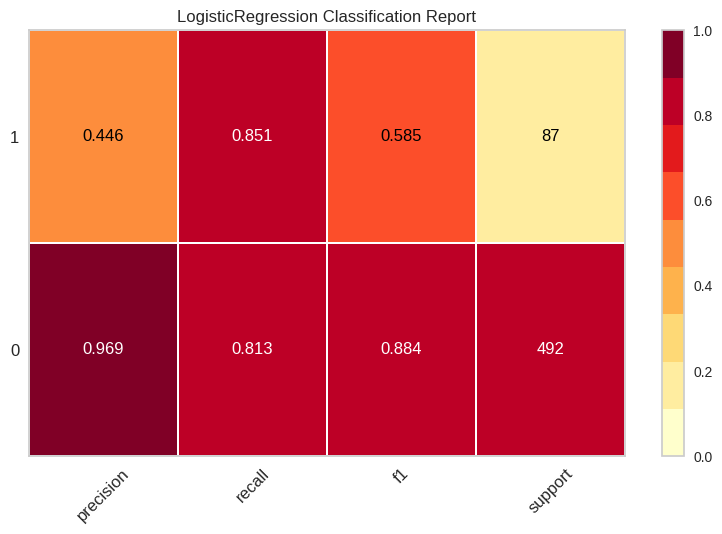

In [47]:
plot_model(lr, plot= 'class_report')

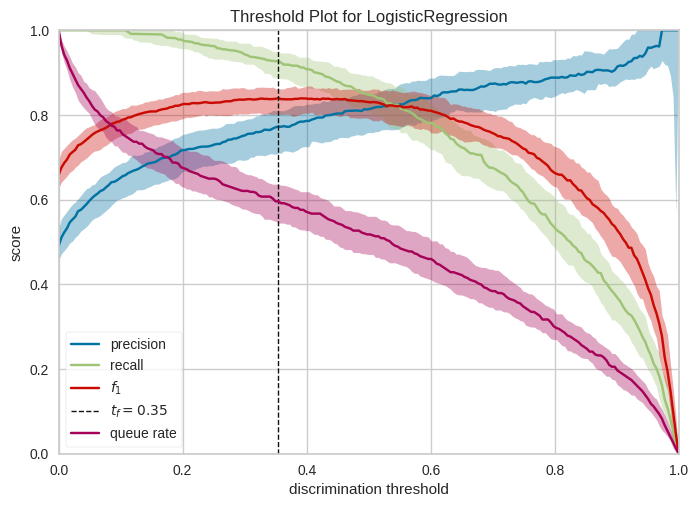

In [48]:
plot_model(lr, plot= 'threshold')

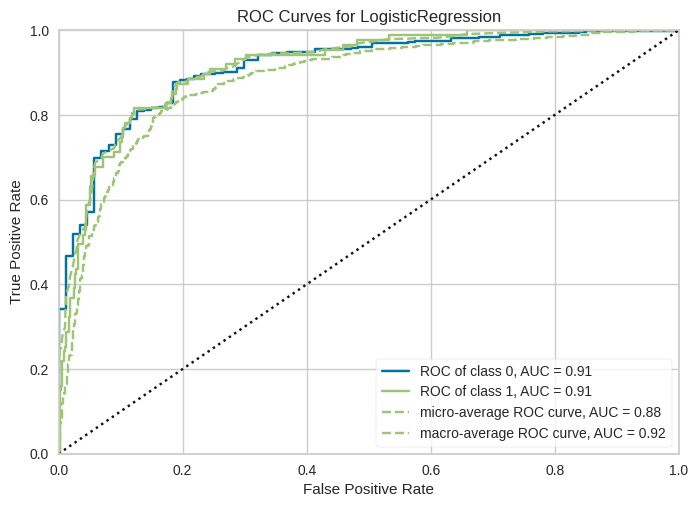

In [49]:
plot_model(lr, plot= 'auc')

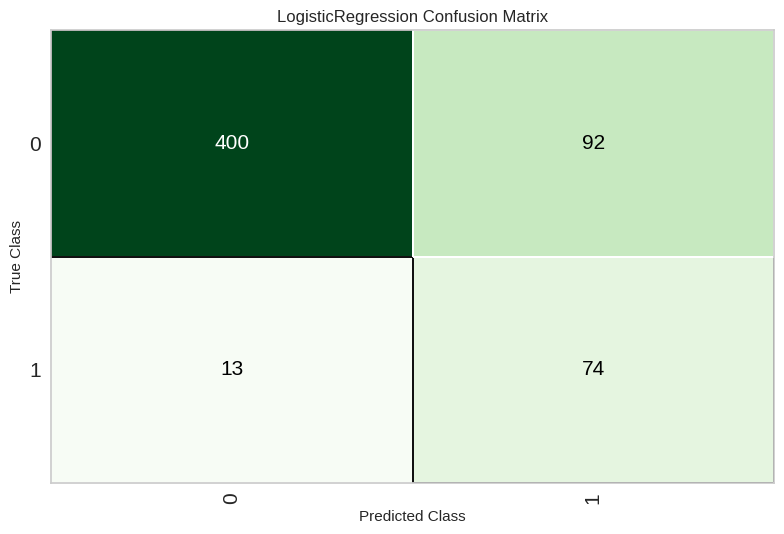

In [50]:
plot_model(lr, plot= 'confusion_matrix')

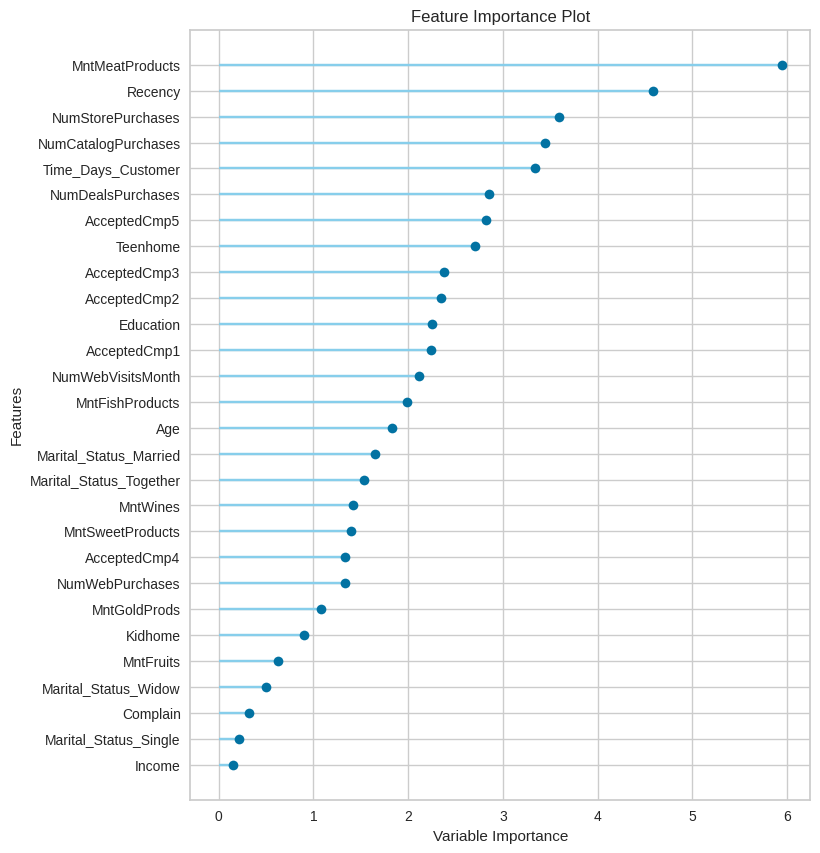

In [51]:
plot_model(lr, plot= 'feature_all')

## Save and Load model

In [52]:
final_model = finalize_model(lr)
save_model(final_model, 'ifood_sales_prospecting_model')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=FastMemory(location=/tmp/joblib),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['AcceptedCmp1', 'AcceptedCmp2',
                                              'AcceptedCmp3', 'AcceptedCmp4',
                                              'AcceptedCmp5', 'Age', 'Complain',
                                              'Education', 'Income', 'Kidhome',
                                              'MntFishProducts', 'MntFruits',
                                              'MntGoldProds', 'MntMeatProducts',
                                              'MntSweetProducts', 'MntWines',
                                              'NumCatalogPurch...
                                     transformer=MinMaxScaler(clip=False,
                                                              copy=True,
                                                              feature_range=(0,
            

In [53]:
saved_model = load_model('ifood_sales_prospecting_model')

Transformation Pipeline and Model Successfully Loaded


In [54]:
print(saved_model)

Pipeline(memory=FastMemory(location=/tmp/joblib),
         steps=[('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['AcceptedCmp1', 'AcceptedCmp2',
                                             'AcceptedCmp3', 'AcceptedCmp4',
                                             'AcceptedCmp5', 'Age', 'Complain',
                                             'Education', 'Income', 'Kidhome',
                                             'MntFishProducts', 'MntFruits',
                                             'MntGoldProds', 'MntMeatProducts',
                                             'MntSweetProducts', 'MntWines',
                                             'NumCatalogPurch...
                                    transformer=MinMaxScaler(clip=False,
                                                             copy=True,
                                                             feature_range=(0,
                          